**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle
import scipy as sp
from sklearn.neighbors import KDTree as KDTree_Sklearn


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    _algo = 'brute'
    _data = 0
    _target = 0
    _n_neighbors = 0
    _result = 0
    _full_results = 0
    _classes = 0
    _proba = 0
    _tree = 0

    def __init__(self, n_neighbors, algorithm='brute'):
        self._n_neighbors = n_neighbors
        self._algo = algorithm

    def fit(self, X, y):
        self._data = X
        self._target = y
        self._classes = np.unique(y)
        if (self._algo != 'brute'):
            self._tree = KDTree_Sklearn(self._data)

    def predict(self, X):
        _n = self._n_neighbors

        if self._algo == 'brute':
            distances = sp.spatial.distance.cdist(X, self._data)
            ressorted = np.argsort(distances, axis=1)
            arr = self._target[ressorted][:, :_n]
        else:
            distances, ressorted = self._tree.query(X, k=_n)
            arr = self._target[ressorted][:, :_n + 1]

        # u, indices = np.unique(arr, return_inverse=True, axis=0)

        ax = 1
        u, indices = np.unique(arr, return_inverse=True)
        indreshape = indices.reshape(arr.shape)
        self._result = u[np.argmax(np.apply_along_axis(
            np.bincount, ax, indreshape, None, np.max(indices) + 1), axis=ax)]

        _classes = self._classes
        _len = len(_classes)

        arrext = np.vstack([np.expand_dims(arr, axis=0)] * _len)
        cmparr = np.asarray(_classes).reshape([_len, 1, 1])
        self._proba = (np.sum(arrext == cmparr, axis=2)/arr.shape[1]).T

#         classes = self._classes
#         output = []
#         for c in classes:
#             # print(c)
#             output.append(np.sum(arr == c, axis=1)/arr.shape[1])
#         self._proba = np.vstack(output).T

        return self._result

    def predict_proba(self, X):
        _pred = self.predict(X)
        return self._proba

    def score(self, X, y):
        _pred = self.predict(X)
        cntarr = np.zeros(_pred.shape)
        cntarr[_pred == y] = 1
        return np.sum(cntarr)/len(cntarr)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=3, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 522 µs, sys: 85 µs, total: 607 µs
Wall time: 552 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 40 µs, sys: 11 µs, total: 51 µs
Wall time: 47.9 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 2.01 ms, sys: 996 µs, total: 3.01 ms
Wall time: 1.96 ms


array([0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 805 µs, sys: 739 µs, total: 1.54 ms
Wall time: 986 µs


array([0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.05 ms, sys: 573 µs, total: 1.62 ms
Wall time: 1.17 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 951 µs, sys: 657 µs, total: 1.61 ms
Wall time: 1.01 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

In [14]:
%matplotlib inline

In [46]:
nmax = 15
iternum = 50
scores = []
meanscores = {}

for n in range(2, nmax + 1):
    for it in range(iternum + 1):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)

        my_clf = MyKNeighborsClassifier(n_neighbors=n, algorithm='brute')
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    meanscores[n] = np.mean(scores)

In [48]:
ns = []
grscores = []

for k,v in meanscores.items():
    ns.append(k)
    grscores.append(v)

In [69]:
print("Наилучший score получился при n =", ns[np.argmax(grscores)])

Наилучший score получился при n = 6


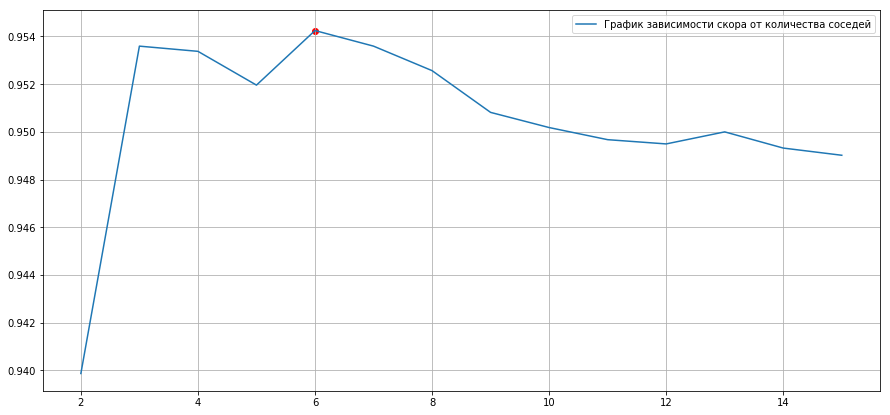

In [70]:
plt.figure(figsize=(15, 7))
plt.plot(ns, grscores)
plt.grid()
plt.scatter(ns[np.argmax(grscores)], grscores[np.argmax(grscores)], color='red')
plt.legend(['График зависимости скора от количества соседей'])

**MNIST**

In [18]:
# mnist = fetch_mldata('MNIST original')

In [19]:
from scipy.io import loadmat

mnist_path = "./mnist-original.mat"
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'],
                                                    mnist['target'],
                                                    test_size=0.01,
                                                    stratify=mnist['target'])

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [22]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [23]:
%time clf.fit(X_train, y_train)

CPU times: user 6.46 ms, sys: 1.71 ms, total: 8.17 ms
Wall time: 7.26 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [24]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2.71 ms, sys: 623 µs, total: 3.33 ms
Wall time: 2.39 ms


In [25]:
%time clf.predict(X_test)

CPU times: user 3.35 s, sys: 398 ms, total: 3.75 s
Wall time: 1.49 s


array([4., 2., 5., 6., 6., 8., 3., 6., 8., 9., 9., 4., 1., 3., 2., 7., 3.,
       1., 7., 2., 0., 2., 8., 9., 5., 9., 4., 0., 6., 0., 5., 4., 9., 2.,
       3., 6., 9., 6., 1., 0., 1., 9., 1., 3., 1., 5., 9., 9., 8., 2., 4.,
       7., 3., 1., 8., 9., 7., 7., 0., 6., 5., 3., 8., 9., 2., 6., 2., 1.,
       4., 7., 9., 6., 2., 2., 5., 1., 0., 5., 6., 2., 3., 0., 6., 1., 7.,
       3., 7., 4., 1., 8., 6., 8., 1., 5., 7., 5., 6., 9., 8., 0., 0., 0.,
       7., 7., 7., 8., 0., 3., 6., 9., 4., 7., 5., 3., 6., 9., 3., 3., 0.,
       1., 9., 9., 4., 7., 6., 1., 0., 2., 0., 0., 9., 1., 5., 3., 5., 7.,
       3., 4., 1., 7., 1., 8., 9., 2., 8., 3., 3., 8., 6., 9., 3., 5., 4.,
       8., 9., 4., 9., 3., 0., 1., 0., 4., 7., 2., 1., 9., 0., 2., 2., 9.,
       2., 2., 5., 8., 6., 7., 0., 4., 1., 1., 8., 6., 3., 3., 1., 8., 3.,
       4., 7., 3., 7., 6., 4., 8., 3., 4., 1., 2., 9., 8., 3., 3., 2., 3.,
       2., 0., 2., 3., 8., 2., 9., 0., 3., 5., 7., 0., 8., 6., 0., 5., 1.,
       8., 7., 1., 1., 9.

In [26]:
%time my_clf.predict(X_test)

CPU times: user 37.7 s, sys: 710 ms, total: 38.4 s
Wall time: 38.4 s


array([4., 2., 5., 6., 6., 8., 3., 6., 8., 9., 9., 4., 1., 3., 2., 7., 3.,
       1., 7., 2., 0., 2., 8., 9., 5., 9., 4., 0., 6., 0., 5., 4., 9., 2.,
       3., 6., 9., 6., 1., 0., 1., 9., 1., 3., 1., 5., 9., 9., 8., 2., 4.,
       7., 3., 1., 8., 9., 7., 7., 0., 6., 5., 3., 8., 9., 2., 6., 2., 1.,
       4., 7., 9., 6., 2., 2., 5., 1., 0., 5., 6., 2., 3., 0., 6., 1., 7.,
       3., 7., 4., 1., 8., 6., 8., 1., 5., 7., 5., 6., 9., 8., 0., 0., 0.,
       7., 7., 7., 8., 0., 3., 6., 9., 4., 7., 5., 3., 6., 9., 3., 3., 0.,
       1., 9., 9., 4., 7., 6., 1., 0., 2., 0., 0., 9., 1., 5., 3., 5., 7.,
       3., 4., 1., 7., 1., 8., 9., 2., 8., 3., 3., 8., 6., 9., 3., 5., 4.,
       8., 9., 4., 9., 3., 0., 1., 0., 4., 7., 2., 1., 9., 0., 2., 2., 9.,
       2., 2., 5., 8., 6., 7., 0., 4., 1., 1., 8., 6., 3., 3., 1., 8., 3.,
       4., 7., 3., 7., 6., 4., 8., 3., 4., 1., 2., 9., 8., 3., 3., 2., 3.,
       2., 0., 2., 3., 8., 2., 9., 0., 3., 5., 7., 0., 8., 6., 0., 5., 1.,
       8., 7., 1., 1., 9.

In [27]:
%time clf.predict_proba(X_test)

CPU times: user 3.45 s, sys: 401 ms, total: 3.85 s
Wall time: 1.53 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [28]:
%time my_clf.predict_proba(X_test)

CPU times: user 38 s, sys: 731 ms, total: 38.7 s
Wall time: 38.9 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [29]:
clf.score(X_test, y_test)

0.9685714285714285

In [30]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 4

In [31]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [33]:
%time clf.fit(X_train, y_train)

CPU times: user 34.4 s, sys: 222 ms, total: 34.6 s
Wall time: 34.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [34]:
%time my_clf.fit(X_train, y_train)

CPU times: user 34.7 s, sys: 259 ms, total: 34.9 s
Wall time: 34.8 s


In [35]:
%time clf.predict(X_test)

CPU times: user 47.7 s, sys: 67.2 ms, total: 47.7 s
Wall time: 47.8 s


array([4., 2., 5., 6., 6., 8., 3., 6., 8., 9., 9., 4., 1., 3., 2., 7., 3.,
       1., 7., 2., 0., 2., 8., 9., 5., 9., 4., 0., 6., 0., 5., 4., 9., 2.,
       3., 6., 9., 6., 1., 0., 1., 9., 1., 3., 1., 5., 9., 9., 8., 2., 4.,
       7., 3., 1., 8., 9., 7., 7., 0., 6., 5., 3., 8., 9., 2., 6., 2., 1.,
       4., 7., 9., 6., 2., 2., 5., 1., 0., 5., 6., 2., 3., 0., 6., 1., 7.,
       3., 7., 4., 1., 8., 6., 8., 1., 5., 7., 5., 6., 9., 8., 0., 0., 0.,
       7., 7., 7., 8., 0., 3., 6., 9., 4., 7., 5., 3., 6., 9., 3., 3., 0.,
       1., 9., 9., 4., 7., 6., 1., 0., 2., 0., 0., 9., 1., 5., 3., 5., 7.,
       3., 4., 1., 7., 1., 8., 9., 2., 8., 3., 3., 8., 6., 9., 3., 5., 4.,
       8., 9., 4., 9., 3., 0., 1., 0., 4., 7., 2., 1., 9., 0., 2., 2., 9.,
       2., 2., 5., 8., 6., 7., 0., 4., 1., 1., 8., 6., 3., 3., 1., 8., 3.,
       4., 7., 3., 7., 6., 4., 8., 3., 4., 1., 2., 9., 8., 3., 3., 2., 3.,
       2., 0., 2., 3., 8., 2., 9., 0., 3., 5., 7., 0., 8., 6., 0., 5., 1.,
       8., 7., 1., 1., 9.

In [36]:
%time my_clf.predict(X_test)

CPU times: user 40.3 s, sys: 60.1 ms, total: 40.4 s
Wall time: 40.4 s


array([4., 2., 5., 6., 6., 8., 3., 6., 8., 9., 9., 4., 1., 3., 2., 7., 3.,
       1., 7., 2., 0., 2., 8., 9., 5., 9., 4., 0., 6., 0., 5., 4., 9., 2.,
       3., 6., 9., 6., 1., 0., 1., 9., 1., 3., 1., 5., 9., 9., 8., 2., 4.,
       7., 3., 1., 8., 9., 7., 7., 0., 6., 5., 3., 8., 9., 2., 6., 2., 1.,
       4., 7., 9., 6., 2., 2., 5., 1., 0., 5., 6., 2., 3., 0., 6., 1., 7.,
       3., 7., 4., 1., 8., 6., 8., 1., 5., 7., 5., 6., 9., 8., 0., 0., 0.,
       7., 7., 7., 8., 0., 3., 6., 9., 4., 7., 5., 3., 6., 9., 3., 3., 0.,
       1., 9., 9., 4., 7., 6., 1., 0., 2., 0., 0., 9., 1., 5., 3., 5., 7.,
       3., 4., 1., 7., 1., 8., 9., 2., 8., 3., 3., 8., 6., 9., 3., 5., 4.,
       8., 9., 4., 9., 3., 0., 1., 0., 4., 7., 2., 1., 9., 0., 2., 2., 9.,
       2., 2., 5., 8., 6., 7., 0., 4., 1., 1., 8., 6., 3., 3., 1., 8., 3.,
       4., 7., 3., 7., 6., 4., 8., 3., 4., 1., 2., 9., 8., 3., 3., 2., 3.,
       2., 0., 2., 3., 8., 2., 9., 0., 3., 5., 7., 0., 8., 6., 0., 5., 1.,
       8., 7., 1., 1., 9.

In [37]:
%time clf.predict_proba(X_test)

CPU times: user 49.4 s, sys: 101 ms, total: 49.5 s
Wall time: 49.5 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [38]:
%time my_clf.predict_proba(X_test)

CPU times: user 41 s, sys: 76.7 ms, total: 41.1 s
Wall time: 41.1 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
clf.score(X_test, y_test)

0.9685714285714285

In [40]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 5

# seaborn
Бибиотека визуализации, написанная "поверх" matplotlib, более элегантная с точки зрения дизайна

# matplotlib
Библиотека визуализации для построения графиков, диаграмм и т.д. Де-факто стандарт для визуализации,
хотя сейчас уже появляется множество инструментов для интерактивной графики - plotly, hicharts и т.д.

# train_test_split
Библиотека для разделение выборки (признаки и таргет) на соответствующие обучающие и тестовую выборки

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
Пайплайн для задач машинного обучения от sklearn, т.е. фреймворк, позволяющий логически объедить все 
задачи от препроцессинга и преобразования даннных до обучения моделей

# StandardScaler (from sklearn.preprocessing import StandardScaler)
Одна из стандартных библиотек нормализации данных (иногда называется ругательным словом "шкалирование")

Ниже группа базовых и миксин-классов sklearn
Миксин — это класс, предназначенный для расширения функциональности других классов

# ClassifierMixin
Класс-примесь для всех классификаторов sklearn

# NeighborsBase
Базовый класс для реализации алгоритма ближайших соседей - определяет базовые методы

# KNeighborsMixin
Класс, расширяющий базовый функцинал NeighborsBase
    
# SupervisedIntegerMixin
Еще один из базовых миксинов, определяющий метод fit для таргетов с целочисленными метками (судя по быстрому просмотру кода)